<h1>Microbiome Data Analysis in R</h1>

In [1]:
library(vegan)

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-4


Let's import the microbiome data set.

In [2]:
filename <- 'Microbiome_Module_Material/Part c full processed data/mouse_set_data_merged_OTUTABLE.csv'

In [3]:
abund_table <- read.csv(filename,row.names=1,check.names=FALSE)

In [4]:
head(abund_table)

,OTU_1,OTU_10,OTU_100,OTU_101,OTU_102,OTU_103,OTU_104,OTU_105,OTU_106,OTU_107,⋯,OTU_90,OTU_91,OTU_92,OTU_93,OTU_94,OTU_95,OTU_96,OTU_97,OTU_98,OTU_99
10d0am,21,2,0,0,0,0,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
10d10,10413,855,6,0,0,0,2,0,36,0,⋯,0,57,0,0,0,0,0,0,19,7
10d11,22394,1471,0,0,0,0,6,0,138,0,⋯,0,102,0,0,0,0,0,0,6,11
10d14,26244,1787,0,0,2,0,5,0,136,0,⋯,1,86,0,0,0,0,0,0,0,11
10d16,22107,1639,0,0,5,0,0,0,53,0,⋯,0,60,0,0,5,0,0,0,0,0
10d18,21280,1831,0,0,0,0,4,0,28,0,⋯,0,36,0,0,8,0,0,0,0,39


In [5]:
abund_table_t<-t(abund_table)

In [6]:
H<-diversity(abund_table, "shannon")

In [7]:
df_H<-data.frame(sample=names(H),value=H,measure=rep("Shannon",
length(H)))

In [8]:
df_H$Group <- with(df_H, ifelse(substring(df_H$sample,1,2)=='10','IBD',
                         ifelse(substring(df_H$sample,1,2)=='9d','IBD',
                         ifelse(substring(df_H$sample,1,2)=='8d','IBD',
                         ifelse(substring(df_H$sample,1,2)=='7d','IBD',
                         ifelse(substring(df_H$sample,1,2)=='6d','IBD','Healthy'))))))

We interest in comparisons of healthy versus IBD during the whole experiment. So we subset the data as below.

In [9]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [10]:
library(ggplot2)

In [11]:
p<-ggplot(df_H, aes(x=value)) + geom_histogram(color="black", fill="black") + facet_grid(Group ~ .)

In [12]:
library(plyr)

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



In [13]:
mu <- ddply(df_H, "Group", summarise, grp.mean=mean(value))

In [14]:
head(mu)

Group,grp.mean
Healthy,2.597881
IBD,2.267853


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


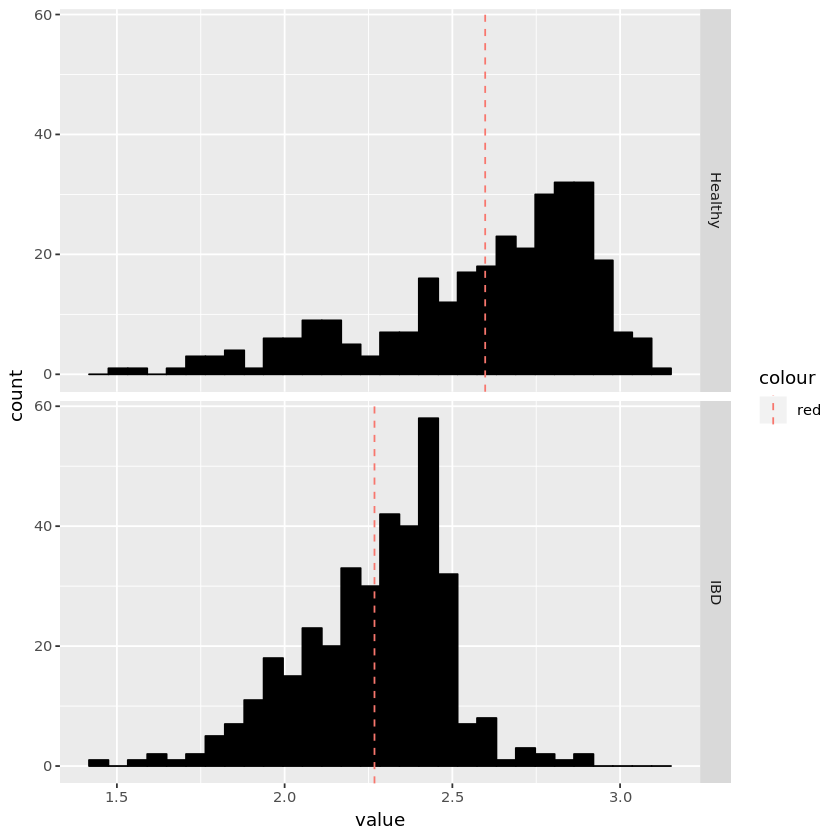

In [15]:
p+geom_vline(data=mu, aes(xintercept=grp.mean, color="red"),linetype="dashed")

In [16]:
library(HMP)

Loading required package: dirmult

Attaching package: ‘HMP’

The following object is masked from ‘package:dirmult’:

    weirMoM



In [83]:
filename_phase1 <- 'Microbiome_Module_Material/Part c full processed data/mouse_set_data_merged_GENUS_phase1.csv'
filename_phase2 <- 'Microbiome_Module_Material/Part c full processed data/mouse_set_data_merged_GENUS_phase2.csv'
abund_table_phase1 <- read.csv(filename_phase1,row.names=1,check.names=FALSE)
abund_table_phase2 <- read.csv(filename_phase2,row.names=1,check.names=FALSE)

In [84]:
head(abund_table_phase1)

,Acetanaerobacterium,Akkermansia,Alistipes,Anaerofilum,Anaerosporobacter,Anaerostipes,Bacteroides,Barnesiella,Bifidobacterium,Bilophila,⋯,Phascolarctobacterium,Pseudoflavonifractor,Roseburia,Ruminococcus,Ruminococcus2,Salmonella,Subdoligranulum,Sutterella,Turicibacter,Vampirovibrio
10d0am,0,7,0,0,0,0,60,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
10d10,0,9460,14,0,0,12,26838,0,0,0,⋯,0,0,11,9,9,0,0,281,0,0
10d11,0,19102,23,0,0,40,53211,0,0,15,⋯,0,0,43,10,8,0,0,180,0,0
10d14,0,21401,26,0,0,41,62261,0,0,5,⋯,5,0,121,39,22,0,0,218,0,0
10d16,0,15863,31,0,5,30,48915,0,0,0,⋯,0,0,547,37,39,0,8,683,0,0
10d18,0,17323,126,0,0,34,48111,0,3,0,⋯,4,0,796,26,25,0,5,601,0,0


In [92]:
head(abund_table_phase2)

,Acetanaerobacterium,Akkermansia,Alistipes,Anaerofilum,Anaerosporobacter,Anaerostipes,Bacteroides,Barnesiella,Bifidobacterium,Bilophila,⋯,Phascolarctobacterium,Pseudoflavonifractor,Roseburia,Ruminococcus,Ruminococcus2,Salmonella,Subdoligranulum,Sutterella,Turicibacter,Vampirovibrio
10d21pm,0,20797,157,0,0,62,37100,0,3,3,⋯,0,0,356,46,16,0,2,668,0,0
10d22am,0,27258,335,0,9,29,22173,0,0,3,⋯,0,0,68,28,98,0,80,134,0,0
10d22pm,0,36738,888,0,17,12,24924,0,0,4,⋯,3,7,46,62,190,0,137,84,0,0
10d23am,0,36582,38,0,0,16,10913,0,0,3067,⋯,1776,82,3,3,934,0,707,0,0,0
10d23pm,0,25116,95,0,10,15,11737,0,0,2,⋯,2,5,9,50,364,0,255,44,0,0
10d24,0,31511,881,0,11,3,26689,0,0,0,⋯,0,9,0,34,204,0,187,491,0,0


In [93]:
nrow(abund_table_phase1)

[1] 184

In [94]:
nrow(abund_table_phase2)

[1] 67

In [95]:
fit_Phase1 <- DM.MoM(abund_table_phase1);fit_Phase2 <- DM.MoM(abund_table_phase2)

In [100]:
numMC <- 1000
nrsGrp1 <- rep(1000, 10)
nrsGrp2 <- rep(1000, 10)
group_Nrs <- list(nrsGrp1, nrsGrp2)

In [103]:
alphap <- fit_Phase1$gamma

In [101]:
pval1 <- MC.Xdc.statistics(group_Nrs, numMC, alphap, 'hnull')

In [102]:
pval1

[1] 0.000999001

In [104]:
alphap <- rbind(fit_Phase1$gamma, fit_Phase2$gamma)
pval2 <- MC.Xdc.statistics(group_Nrs, numMC, alphap)
pval2

[1] 0.996004

In [106]:
MC.Xdc.statistics(group_Nrs, numMC = 1000, alphap, type = "ha", siglev = 0.05, est = "mom")

[1] 0.994006

**COmmunity Diversity**

The extremely simple function specnumber can be used to find the number of
species. However, this method ignores the identity of the
taxa (genera in this case) and their abundances, two very different communities
might be identical.

In [108]:
num_genera <- specnumber(abund_table_phase1)
num_genera

10d0am   10d10   10d11   10d14   10d16   10d18  10d1am  10d1pm 10d21am  10d2am 
      4      24      23      27      26      28      22      27      26      29 
 10d2pm  10d3am  10d3pm  10d4am  10d4pm    10d5    10d6    10d7    10d8    10d9 
     32      28      30      31      27      31      27      26      27      27 
  2d0am   2d0pm    2d10    2d11    2d14    2d16    2d18   2d1am   2d1pm  2d21am 
     15      20      32      35      31      31      34      12      17      34 
  2d2am   2d2pm   2d3am   2d3pm   2d4am   2d4pm     2d5     2d6     2d7     2d8 
     34      26      27      32      32      33      30      31      34      32 
    2d9   3d0am   3d0pm    3d10    3d11    3d14    3d16    3d18   3d1am   3d1pm 
     28      15      13      30      32      30      23      35      15      18 
 3d21am   3d2am   3d2pm   3d3am   3d3pm   3d4am   3d4pm     3d5     3d6     3d7 
     35      28      31      32      29      30      29      32      35      33 
    3d8     3d9   4d0am   4d0pm    4d10    4d11    4d14    4d16    4d18   4d1am 
     26      30      17      19      31      31      32      33      36      12 
  4d1pm  4d21am   4d2am   4d2pm   4d3am   4d3pm   4d4am   4d4pm     4d5     4d6 
     14      35      28      31      29      28      28      31      31      33 
    4d7     4d8     4d9   5d0am   5d0pm    5d10    5d11    5d14    5d16    5d18 
     33      29      33      22      17      37      34      31      33      34 
  5d1am   5d1pm  5d21am   5d2am   5d2pm   5d3am   5d3pm   5d4am   5d4pm     5d5 
     11      20      36      30      29      32      32      34      33      34 
    5d6     5d7     5d8     5d9   6d0am    6d10    6d11    6d14    6d16    6d18 
     36      32      25      29      25      27      28      26      28      30 
  6d1am   6d1pm  6d21am   6d2am   6d2pm   6d3am   6d3pm   6d4am   6d4pm     6d5 
     20      26      30      32      33      29      25      27      29      26 
    6d6     6d7     6d8     6d9   7d0am    7d10    7d11    7d14    7d16    7d18 
     27      27      23      26      28      29      25      26      26      28 
  7d1am   7d1pm  7d21am   7d2am   7d2pm   7d3am   7d3pm   7d4am   7d4pm     7d5 
     23      31      29      28      32      32      30      33      26      28 
    7d6     7d7     7d8     7d9   8d0am    8d10    8d11    8d14    8d16    8d18 
     25      28      22      26      28      26      26      24      28      29 
  8d1am   8d1pm  8d21am   8d2am   8d2pm   8d3am   8d3pm   8d4am   8d4pm     8d5 
     26      30      27      29      33      33      30      29      30      29 
    8d6     8d7     8d8     8d9   9d0am    9d10    9d11    9d14    9d16    9d18 
     26      26      22      29      17      25      25      25      22      26 
  9d1am   9d1pm  9d21am   9d2am   9d2pm   9d3am   9d3pm   9d4am   9d4pm     9d5 
     24      30      28      31      29      32      32      32      31      31 
    9d6     9d7     9d8     9d9 
     27      26      25      29

We can also estimate the number of genera and Chao1 index in our Vdr−/− mice
data set using estimateR() function. We will get the observed number of genera in
each sample, and the estimated number of Chao1 estimator.

In [110]:
index <- estimateR(abund_table_phase1)
index

,10d0am,10d10,10d11,10d14,10d16,10d18,10d1am,10d1pm,10d21am,10d2am,⋯,9d2pm,9d3am,9d3pm,9d4am,9d4pm,9d5,9d6,9d7,9d8,9d9
S.obs,4.0000000,24.0000000,23.000000,27.000000,26.0000000,28.000000,22.0000000,27.0000000,26.000000,29.0000000,⋯,29.000000,32.0000000,32.0000000,32.000000,31.0000000,31.0000000,27.000000,26.000000,25.0000000,29.000000
S.chao1,4.0000000,24.0000000,23.000000,27.500000,26.0000000,28.500000,22.0000000,27.0000000,26.000000,29.0000000,⋯,29.000000,32.3333333,32.0000000,32.000000,31.0000000,31.0000000,27.000000,26.000000,25.0000000,32.000000
se.chao1,0.0000000,0.4894725,0.000000,1.291141,0.4902903,1.291419,0.4885042,0.4906534,0.000000,0.4913037,⋯,0.000000,0.9229927,0.1640418,0.000000,0.1639565,0.1639565,0.000000,0.000000,0.4898979,4.595344
S.ACE,4.0000000,24.3657407,23.000000,28.081325,26.3599634,29.215341,22.6977778,27.4412800,26.000000,29.9890760,⋯,29.000000,33.0291053,32.2723518,32.000000,31.5991643,31.4615324,27.000000,26.000000,25.4643534,30.248464
se.ACE,0.8660254,2.1986299,1.817787,2.279124,2.3080797,2.339317,1.6436354,1.9852565,2.009592,1.7519556,⋯,2.406887,2.2842897,2.6316425,2.338536,2.5568493,2.4246531,2.018434,2.261722,1.9266019,2.459880


One of the most popular measures of species diversity is Shannon-Wiener diversity
index, labeled as H′. It considers the differences in proportion or abundance of each
species. This index is based on information theory, measures the uncertainty: How
difficult would it be to predict correctly the species of the next individual collected?

In [111]:
shannon_genus <- diversity(abund_table_phase1, index="shannon", MARGIN=1)
shannon_genus

10d0am     10d10     10d11     10d14     10d16     10d18    10d1am    10d1pm 
0.6727742 1.3544720 1.1873427 1.1522036 1.2882779 1.3833458 0.6511128 0.8654125 
  10d21am    10d2am    10d2pm    10d3am    10d3pm    10d4am    10d4pm      10d5 
1.4375015 1.2712880 1.2065933 1.2293513 1.2106821 1.2976051 1.2070560 1.2892317 
     10d6      10d7      10d8      10d9     2d0am     2d0pm      2d10      2d11 
1.3242865 1.3675797 1.4010740 1.3346488 1.3133155 1.1785375 1.5265842 1.6408051 
     2d14      2d16      2d18     2d1am     2d1pm    2d21am     2d2am     2d2pm 
1.3938301 1.2533220 1.4773390 1.4719237 1.0812056 1.4673371 1.1011491 1.4231514 
    2d3am     2d3pm     2d4am     2d4pm       2d5       2d6       2d7       2d8 
1.2568155 1.3447231 1.2646519 1.4423133 1.3095335 1.4288598 1.5958015 1.3241929 
      2d9     3d0am     3d0pm      3d10      3d11      3d14      3d16      3d18 
1.6138143 1.3410093 1.2290926 1.4346879 1.4663520 1.5112414 1.3454231 1.4842535 
    3d1am     3d1pm    3d21am     3d2am     3d2pm     3d3am     3d3pm     3d4am 
1.3016873 0.8182334 1.5846209 1.1211366 1.4092973 1.3616510 1.2979254 1.1410714 
    3d4pm       3d5       3d6       3d7       3d8       3d9     4d0am     4d0pm 
1.3003102 1.2723543 1.3083672 1.4116708 1.1208288 1.6266011 1.2167896 0.8762111 
     4d10      4d11      4d14      4d16      4d18     4d1am     4d1pm    4d21am 
1.8225141 1.5967246 1.4110352 1.3770899 1.6089279 1.3500585 0.9011588 1.6150487 
    4d2am     4d2pm     4d3am     4d3pm     4d4am     4d4pm       4d5       4d6 
1.0601137 1.4667073 1.3597100 1.2898348 1.1352068 1.1935876 1.4352159 1.4316745 
      4d7       4d8       4d9     5d0am     5d0pm      5d10      5d11      5d14 
1.7048693 1.2046371 1.7762211 0.8453086 1.2184309 1.6481749 1.4672358 1.4473265 
     5d16      5d18     5d1am     5d1pm    5d21am     5d2am     5d2pm     5d3am 
1.3909563 1.4950799 1.2671079 0.9400353 1.4433261 1.2418858 1.4408201 1.5102098 
    5d3pm     5d4am     5d4pm       5d5       5d6       5d7       5d8       5d9 
1.0603991 1.3438368 1.2723259 1.3933027 1.4064943 1.4950423 1.4786643 1.6307491 
    6d0am      6d10      6d11      6d14      6d16      6d18     6d1am     6d1pm 
0.9717819 1.4710567 1.4880862 1.2664255 1.3618605 1.3688230 0.5950744 0.6168664 
   6d21am     6d2am     6d2pm     6d3am     6d3pm     6d4am     6d4pm       6d5 
1.4850057 1.0192129 1.1872900 1.2285688 0.9736493 1.3748234 1.3108414 1.3518119 
      6d6       6d7       6d8       6d9     7d0am      7d10      7d11      7d14 
1.3915574 1.3918922 1.3011029 1.3374114 1.1836091 1.4924697 1.2357785 1.2563386 
     7d16      7d18     7d1am     7d1pm    7d21am     7d2am     7d2pm     7d3am 
1.2597695 1.4316563 0.6631948 0.9237133 1.4255184 1.1825595 1.1873266 1.0373087 
    7d3pm     7d4am     7d4pm       7d5       7d6       7d7       7d8       7d9 
1.0131473 1.2714420 1.2351595 1.3766114 1.3201628 1.4102199 1.2547272 1.3874418 
    8d0am      8d10      8d11      8d14      8d16      8d18     8d1am     8d1pm 
1.0465898 1.3844459 1.2296043 1.2411015 1.3545574 1.3928256 0.5885674 0.7146200 
   8d21am     8d2am     8d2pm     8d3am     8d3pm     8d4am     8d4pm       8d5 
1.3534428 1.1335514 1.2264284 1.2712002 1.1509487 1.2348487 1.2800373 1.3496346 
      8d6       8d7       8d8       8d9     9d0am      9d10      9d11      9d14 
1.3259505 1.3813019 1.2958893 1.4513686 1.2342050 1.4180646 1.3035686 1.2826991 
     9d16      9d18     9d1am     9d1pm    9d21am     9d2am     9d2pm     9d3am 
1.3127214 1.4179648 0.4500046 0.7989152 1.4787414 1.0989535 1.1657730 1.1535585 
    9d3pm     9d4am     9d4pm       9d5       9d6       9d7       9d8       9d9 
1.0852689 1.2194686 1.3017663 1.3812715 1.3053358 1.3813920 1.4305928 1.3986489

Simpson non-parametric measure of diversity states that diversity is inversely related to the
probability that two individuals picked at random belong to the same species

In [112]:
simp_genus <- diversity(abund_table_phase1, index="simpson", MARGIN=1)
simp_genus

10d0am     10d10     10d11     10d14     10d16     10d18    10d1am    10d1pm 
0.3283419 0.6156094 0.5554886 0.5392254 0.5753468 0.6094269 0.2486536 0.3203287 
  10d21am    10d2am    10d2pm    10d3am    10d3pm    10d4am    10d4pm      10d5 
0.6274019 0.5696289 0.5680157 0.5672440 0.5791174 0.6016069 0.5636479 0.5579305 
     10d6      10d7      10d8      10d9     2d0am     2d0pm      2d10      2d11 
0.6119180 0.6364341 0.6329845 0.6303658 0.5336240 0.5236687 0.6174193 0.6484598 
     2d14      2d16      2d18     2d1am     2d1pm    2d21am     2d2am     2d2pm 
0.5796685 0.4808735 0.5900877 0.7398210 0.5497798 0.5939694 0.4557755 0.6126364 
    2d3am     2d3pm     2d4am     2d4pm       2d5       2d6       2d7       2d8 
0.5429784 0.5769520 0.5398152 0.6186271 0.5504688 0.5639702 0.6246611 0.5347144 
      2d9     3d0am     3d0pm      3d10      3d11      3d14      3d16      3d18 
0.6458453 0.5996767 0.6534593 0.5775889 0.5976652 0.6079083 0.5532877 0.5981726 
    3d1am     3d1pm    3d21am     3d2am     3d2pm     3d3am     3d3pm     3d4am 
0.6431942 0.4184059 0.6372713 0.4747867 0.5970531 0.5717897 0.5365200 0.4616973 
    3d4pm       3d5       3d6       3d7       3d8       3d9     4d0am     4d0pm 
0.5089914 0.5151044 0.5075274 0.5627263 0.4567329 0.6721167 0.5973769 0.3263578 
     4d10      4d11      4d14      4d16      4d18     4d1am     4d1pm    4d21am 
0.7078336 0.6305882 0.5832357 0.5765934 0.6406251 0.6735256 0.4558212 0.6385148 
    4d2am     4d2pm     4d3am     4d3pm     4d4am     4d4pm       4d5       4d6 
0.4868115 0.6488212 0.5702750 0.5562152 0.4615375 0.4738859 0.5732225 0.5626698 
      4d7       4d8       4d9     5d0am     5d0pm      5d10      5d11      5d14 
0.6722552 0.4600176 0.6980417 0.3155146 0.6643359 0.6854420 0.6225026 0.6217999 
     5d16      5d18     5d1am     5d1pm    5d21am     5d2am     5d2pm     5d3am 
0.5590567 0.6062073 0.6242586 0.4638177 0.5978700 0.5421375 0.6447977 0.6489851 
    5d3pm     5d4am     5d4pm       5d5       5d6       5d7       5d8       5d9 
0.4287977 0.5290764 0.5081298 0.5595129 0.5579803 0.6318086 0.6157390 0.6727305 
    6d0am      6d10      6d11      6d14      6d16      6d18     6d1am     6d1pm 
0.3550456 0.6433117 0.6666241 0.5965578 0.5941585 0.5985433 0.2163344 0.2291583 
   6d21am     6d2am     6d2pm     6d3am     6d3pm     6d4am     6d4pm       6d5 
0.6673163 0.4295712 0.5527553 0.5804617 0.4707739 0.6307063 0.6063495 0.5892416 
      6d6       6d7       6d8       6d9     7d0am      7d10      7d11      7d14 
0.6139432 0.6319890 0.5461599 0.6272472 0.4978788 0.6668550 0.5641043 0.5698520 
     7d16      7d18     7d1am     7d1pm    7d21am     7d2am     7d2pm     7d3am 
0.5448992 0.6186617 0.2556630 0.3562646 0.6149769 0.5272005 0.5529789 0.4763013 
    7d3pm     7d4am     7d4pm       7d5       7d6       7d7       7d8       7d9 
0.4925827 0.5669641 0.5673759 0.5843748 0.5739372 0.6314404 0.5590970 0.6384639 
    8d0am      8d10      8d11      8d14      8d16      8d18     8d1am     8d1pm 
0.3815286 0.6097956 0.5715983 0.5592178 0.6021906 0.6044981 0.2170795 0.2699551 
   8d21am     8d2am     8d2pm     8d3am     8d3pm     8d4am     8d4pm       8d5 
0.5900978 0.4991693 0.5571370 0.5926313 0.5676798 0.5651212 0.5954132 0.6010110 
      8d6       8d7       8d8       8d9     9d0am      9d10      9d11      9d14 
0.6066744 0.6312770 0.5863014 0.6478648 0.5913964 0.6379702 0.5987395 0.5913395 
     9d16      9d18     9d1am     9d1pm    9d21am     9d2am     9d2pm     9d3am 
0.5694430 0.6369225 0.1550181 0.3040036 0.6522548 0.4551837 0.5600191 0.5210543 
    9d3pm     9d4am     9d4pm       9d5       9d6       9d7       9d8       9d9 
0.5527441 0.5346367 0.6179233 0.5952576 0.5834730 0.6386542 0.6442330 0.6510739

**Beta Diversity**

Measures of dissimilarity
include Euclidian distance, Manhattan, and Bray-Curtis measures. The Bray-Curtis dissimilarity, named after J. Roger Bray and John T. Curtis
(Bray and Curtis 1957), is a statistic measure used to quantify the compositional
dissimilarity between two different samples, based on counts at each sample.

In [115]:
library(BiodiversityR)

Loading required package: tcltk
Warning message:
“no DISPLAY variable so Tk is not available”BiodiversityR 2.11-1: Use command BiodiversityRGUI() to launch the Graphical User Interface; 
to see changes use BiodiversityRGUI(changeLog=TRUE, backward.compatibility.messages=TRUE)



In [120]:
bray <- vegdist(abund_table_phase1,"bray")
bray

            10d0am      10d10      10d11      10d14      10d16      10d18
10d10   0.99704129                                                       
10d11   0.99838307 0.31273276                                            
10d14   0.99856412 0.36115837 0.07218391                                 
10d16   0.99814126 0.28355984 0.06452376 0.13051979                      
10d18   0.99828326 0.27949291 0.07861167 0.13272764 0.04847988           
10d1am  0.99691294 0.37820323 0.34298225 0.39228466 0.30907721 0.31856041
10d1pm  0.99687282 0.33626800 0.35632253 0.39997235 0.31738208 0.32274008
10d21am 0.99872362 0.39783458 0.11815309 0.06120085 0.15214772 0.13371267
10d2am  0.99759904 0.24635644 0.24873843 0.29914777 0.20966850 0.19778932
10d2pm  0.99818218 0.35698538 0.13669237 0.16293093 0.13717276 0.11021264
10d3am  0.99773763 0.28313318 0.19799226 0.25861486 0.16427181 0.16809136
10d3pm  0.99814881 0.33655718 0.16025204 0.18836823 0.16353393 0.15022294
10d4am  0.99793227 0.29533328 0.196274

**EDA**

In [119]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("phyloseq")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Bioconductor version 3.8 (BiocManager 1.30.4), R 3.5.1 (2018-07-02)
Installing package(s) 'BiocVersion', 'phyloseq'
also installing the dependencies ‘Rhdf5lib’, ‘rhdf5’, ‘ade4’, ‘ape’, ‘biomformat’, ‘igraph’, ‘multtest’

Warning message in install.packages(pkgs = doing, lib = lib, repos = repos, ...):
“installation of package ‘Rhdf5lib’ had non-zero exit status”Warning message in install.packages(pkgs = doing, lib = lib, repos = repos, ...):
“installation of package ‘ade4’ had non-zero exit status”Warning message in install.packages(pkgs = doing, lib = lib, repos = repos, ...):
“installation of package ‘ape’ had non-zero exit status”Warning message in install.packages(pkgs = doing, lib = lib, repos = repos, ...):
“installation of package ‘igraph’ had non-zero exit status”Warning message in install.packages(pkgs = doing, lib = lib, repos = repos, ...):
“installation of package ‘multtest’ had non-zero exit stat

In [10]:
library(phyloseq)

In [56]:
filename_phase2_otu <- 'Microbiome_Module_Material/Part c full processed data/mouse_set_data_merged_GENUS_phase2.csv'
abund_table_phase2_otu <- read.csv(filename_phase2_otu,row.names=1,check.names=FALSE)

In [57]:
meta_table <- data.frame(row.names=rownames(abund_table_phase2_otu),t(as.data.frame(strsplit(rownames(abund_table_phase2_otu),"d"))))

In [58]:
meta_table$Group <- with(meta_table,ifelse(as.factor(X1)%in%c(10,9,8,7,6),c("IBD"), c("Healthy")))

In [62]:
head(meta_table)

,X1,X2,Group
10d21pm,10,21pm,IBD
10d22am,10,22am,IBD
10d22pm,10,22pm,IBD
10d23am,10,23am,IBD
10d23pm,10,23pm,IBD
10d24,10,24,IBD


In [63]:
OTU = otu_table(as.matrix(abund_table_phase2_otu), taxa_are_rows = FALSE)

In [64]:
SAM = sample_data(meta_table)

In [65]:
physeq<-merge_phyloseq(phyloseq(OTU),SAM)

Warning message:
“Removed 335 rows containing missing values (geom_errorbar).”

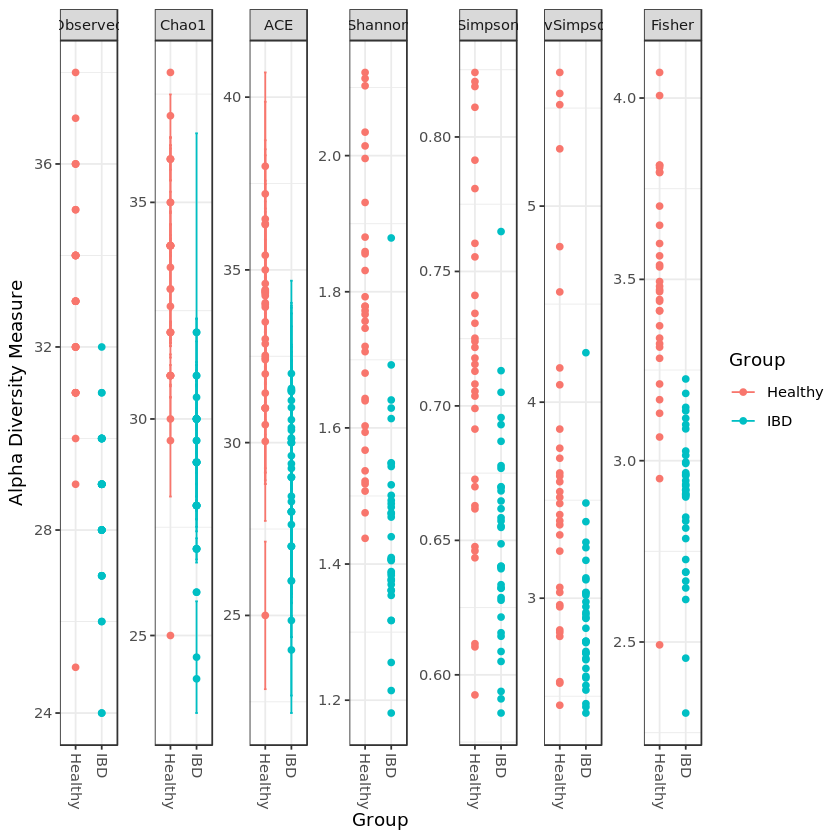

In [66]:
plot_richness(physeq, x = "Group", color = "Group")

Warning message:
“Removed 665 rows containing missing values (geom_errorbar).”

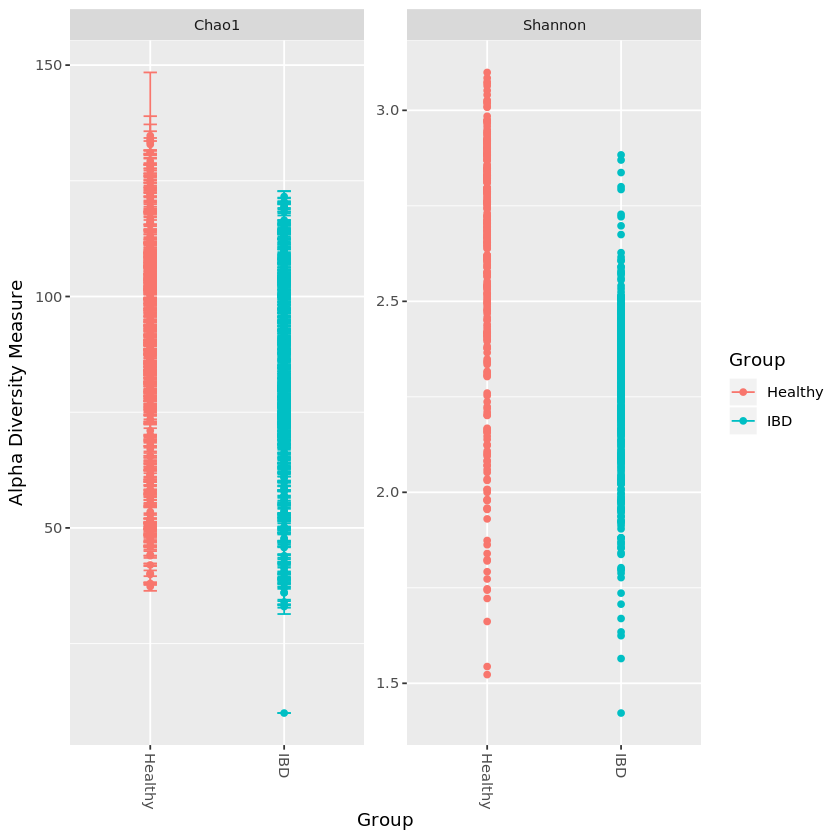

In [24]:
plot_richness(physeq, measures = c("Chao1", "Shannon"),x = "Group", color= "Group")

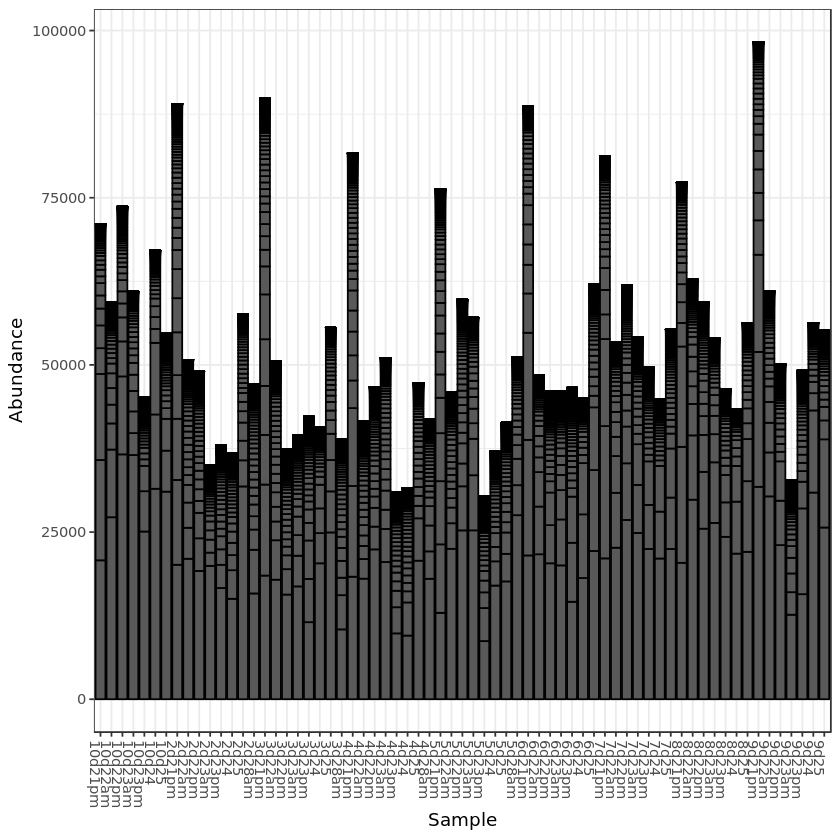

In [60]:

plot_bar(physeq, x='Sample', y='Abundance', fill=NULL, title=NULL,facet_grid=NULL)

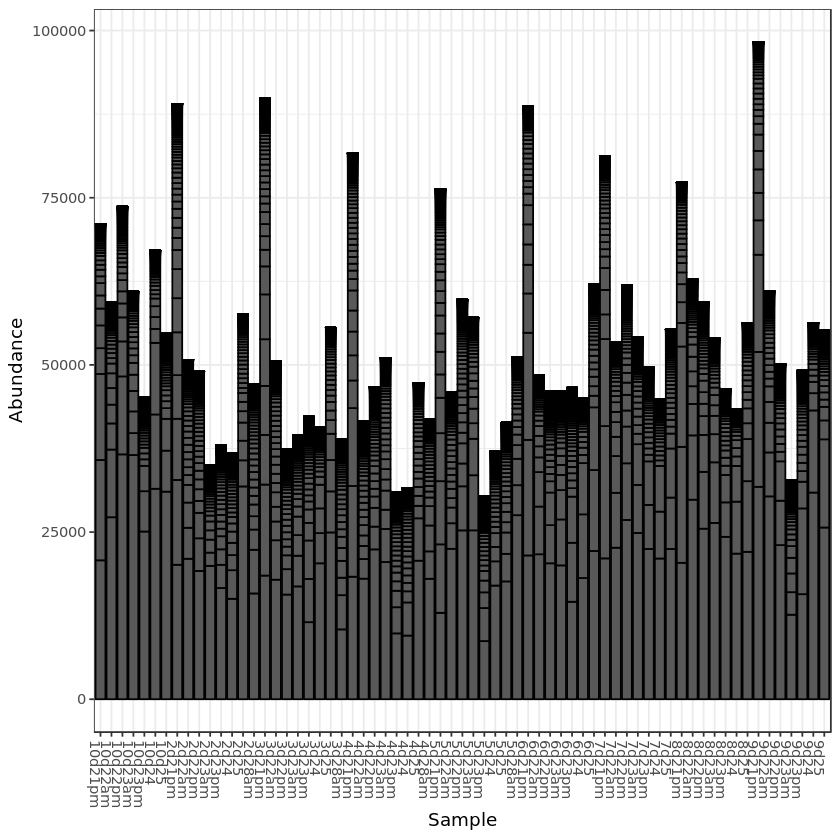

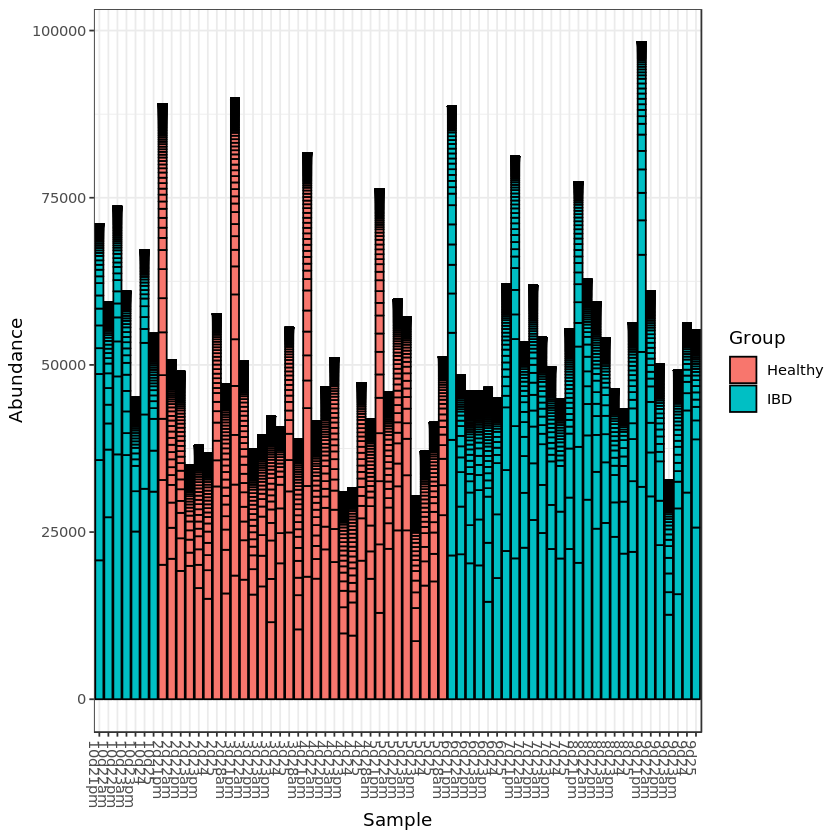

In [48]:
theme_set(theme_bw())
plot_bar(physeq)
plot_bar(physeq, fill="Group")

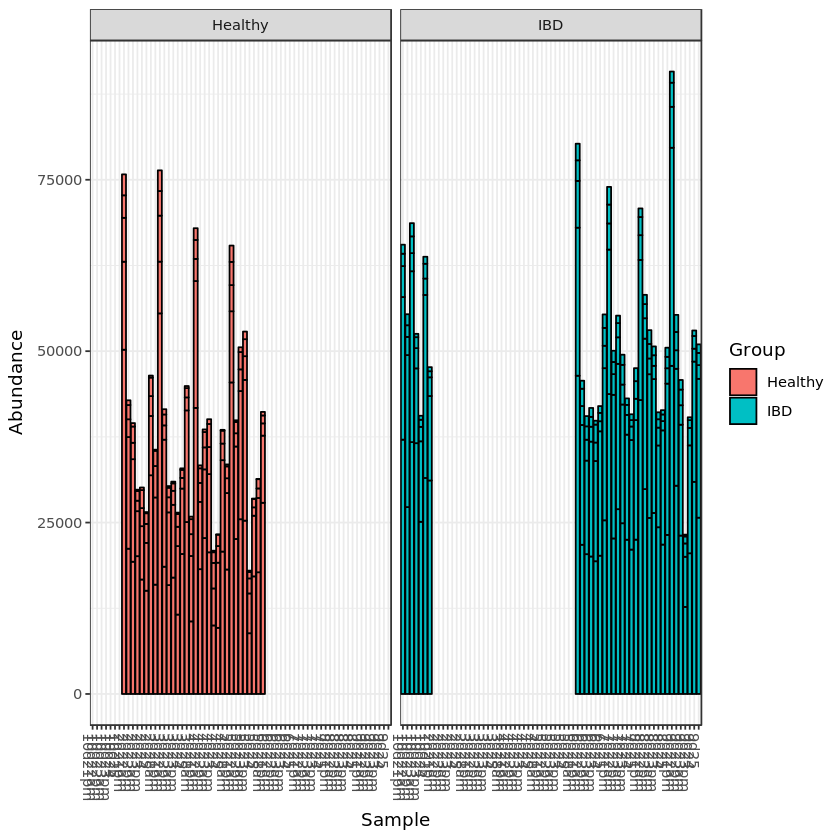

In [67]:
TopNGenus <- names(sort(taxa_sums(physeq), TRUE)[1:5])
Top5Genus <- prune_taxa(TopNGenus,physeq)
plot_bar(Top5Genus, fill="Group", facet_grid=~Group)

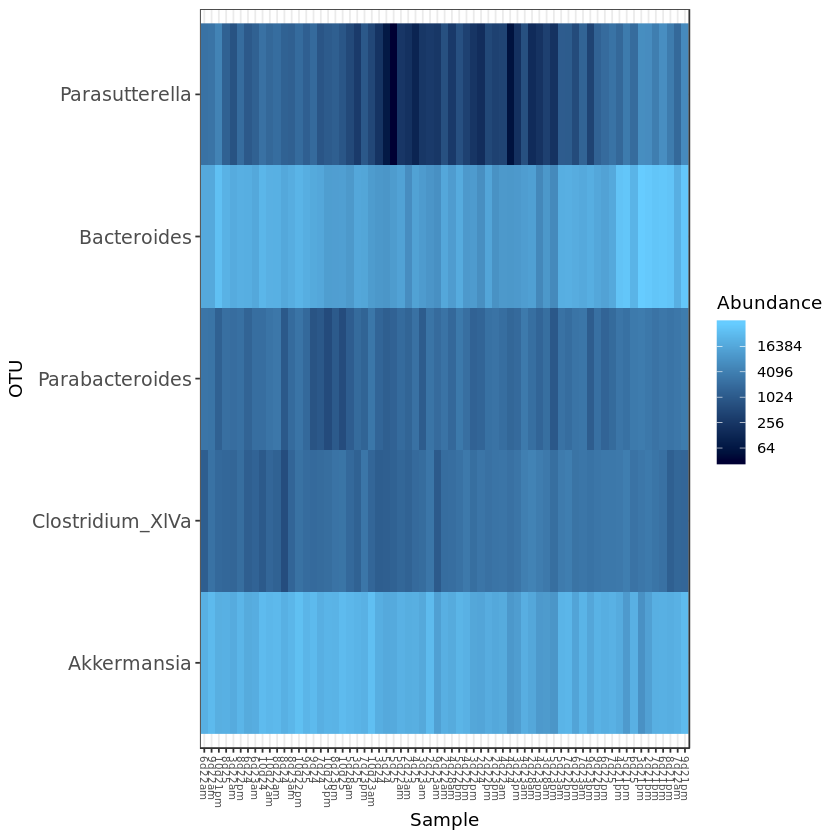

In [68]:
plot_heatmap(Top5Genus, method = 'NMDS', distance = 'bray', sample.label =
NULL, taxa.label = NULL, low = '#000033', high = '#66CCFF', na.value =
'black')

Warning message:
“Transformation introduced infinite values in discrete y-axis”

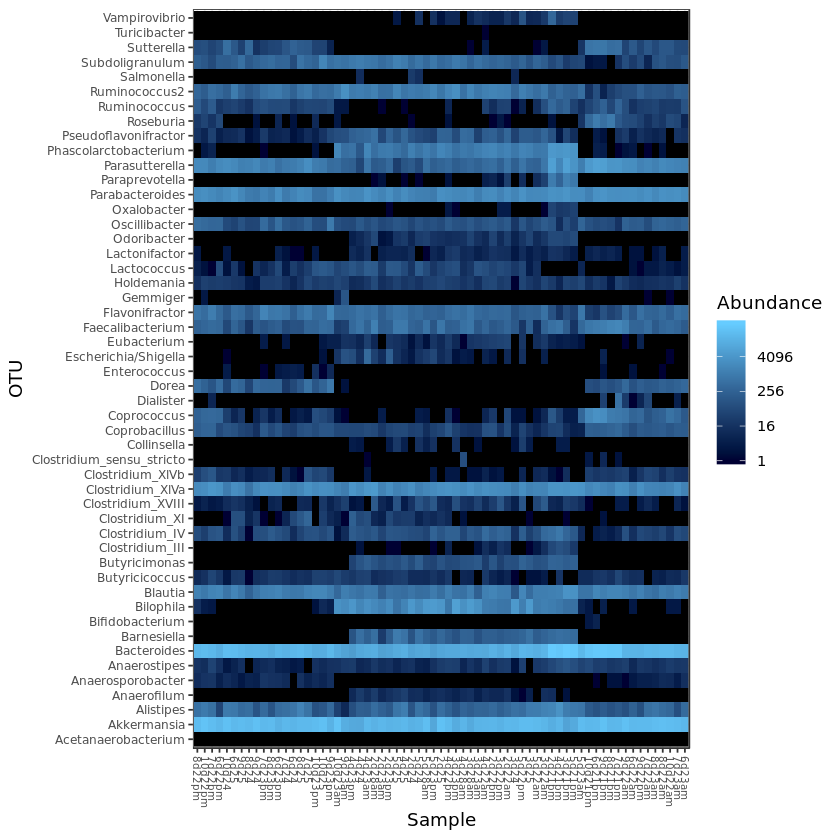

In [71]:
plot_heatmap(physeq, method = 'NMDS', distance = 'bray', sample.label =
NULL, taxa.label = NULL, low = '#000033', high = '#66CCFF', na.value =
'black')

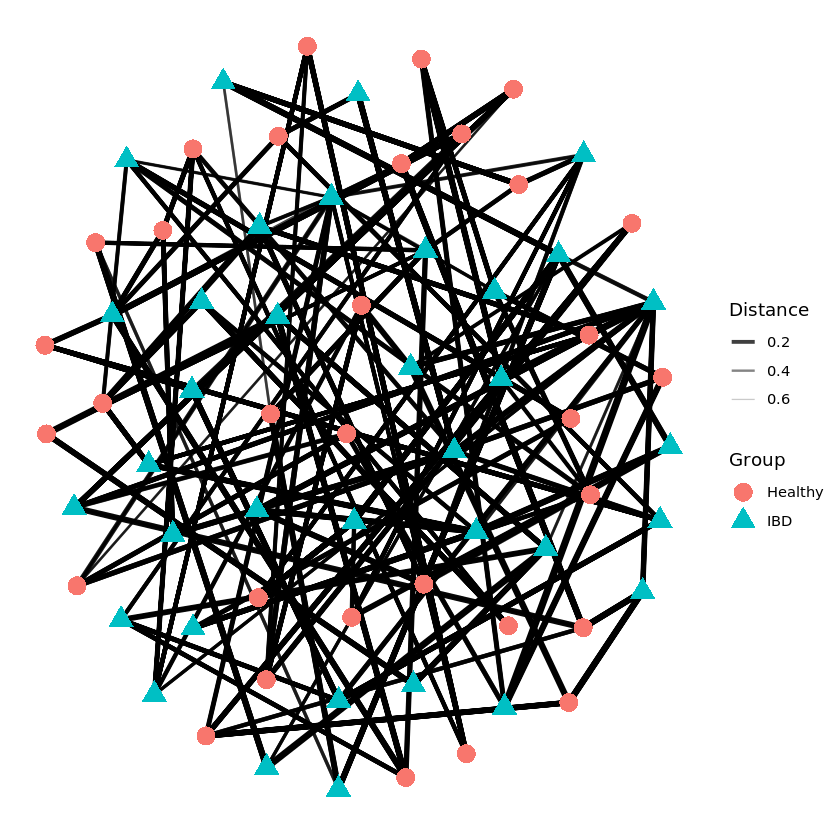

In [70]:
plot_net(Top5Genus, distance = 'bray', type = 'samples', maxdist = 0.7, color = 'Group', shape = 'Group')

Warning message:
“attributes are not identical across measure variables; they will be dropped”

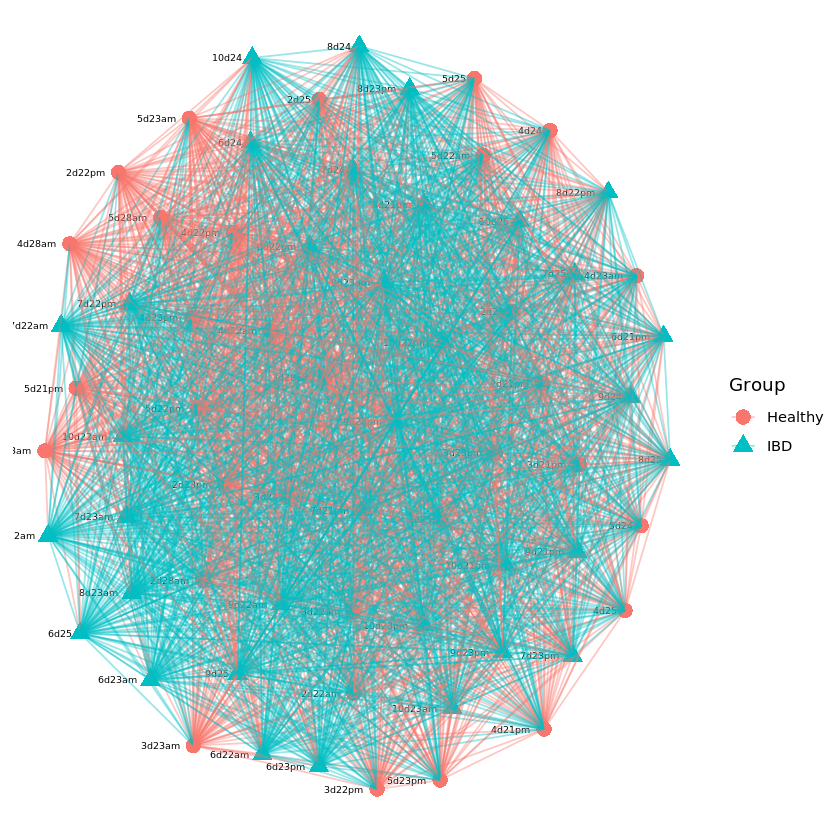

In [72]:
ig <- make_network(physeq, max.dist=0.8)
plot_network(ig, physeq, color="Group", shape="Group")

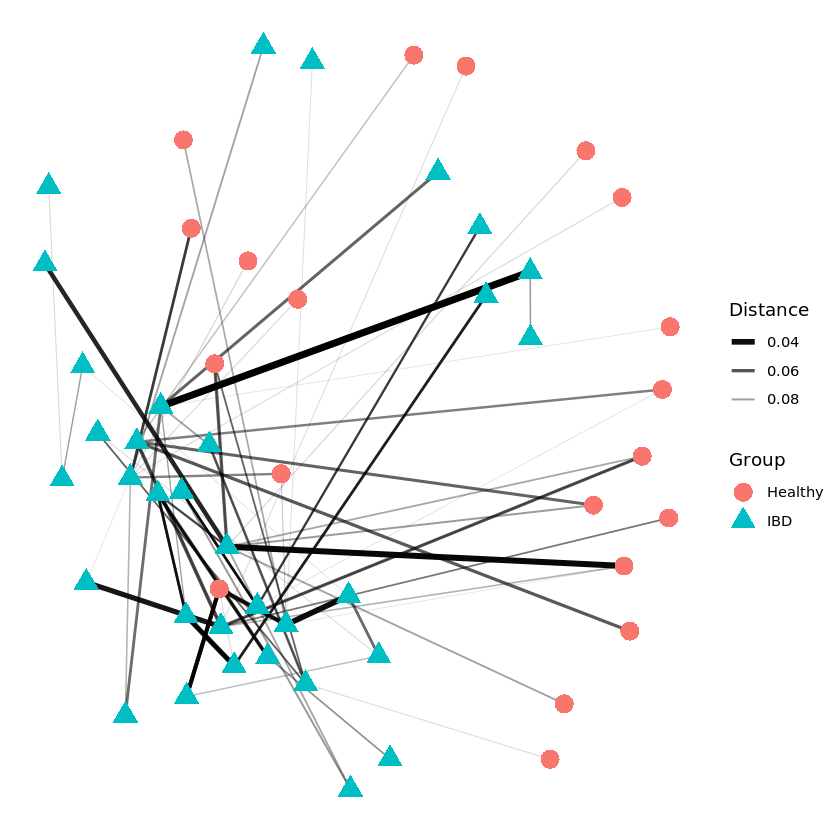

In [74]:
plot_net(physeq, maxdist = 0.1, color = "Group", shape="Group")

**Clustering**

In [77]:
abund_table_norm <- decostand(abund_table_phase2_otu, "normalize")
bc_dist<- vegdist(abund_table_norm , method = "bray")
cluster_single <- hclust (bc_dist, method = 'single')

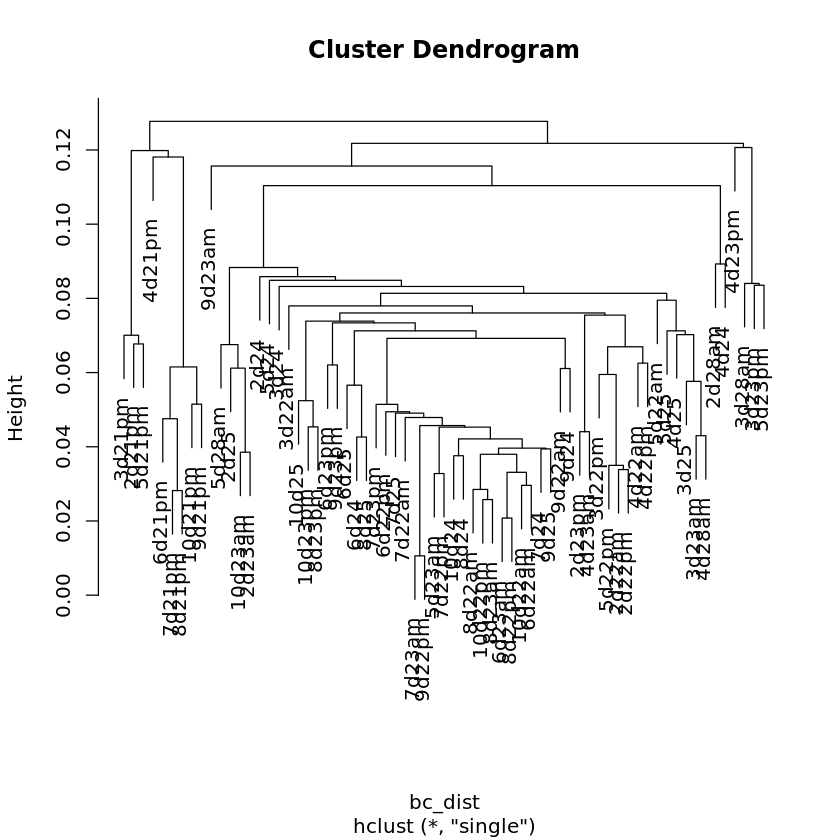

In [78]:
plot(cluster_single)

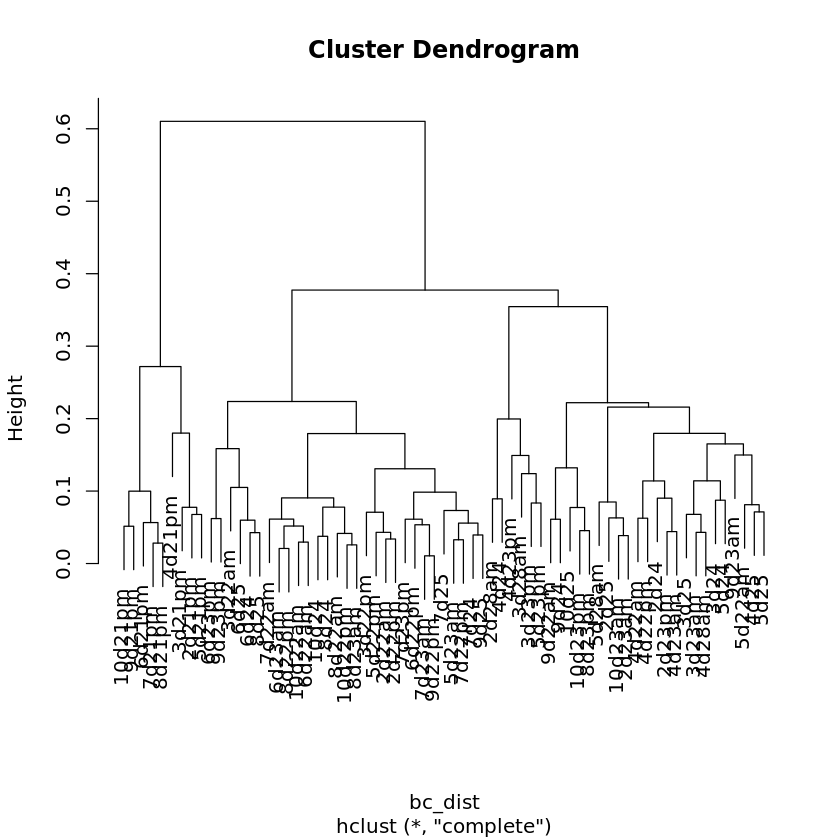

In [80]:
cluster_complete <- hclust (bc_dist, method = 'complete')
plot(cluster_complete)

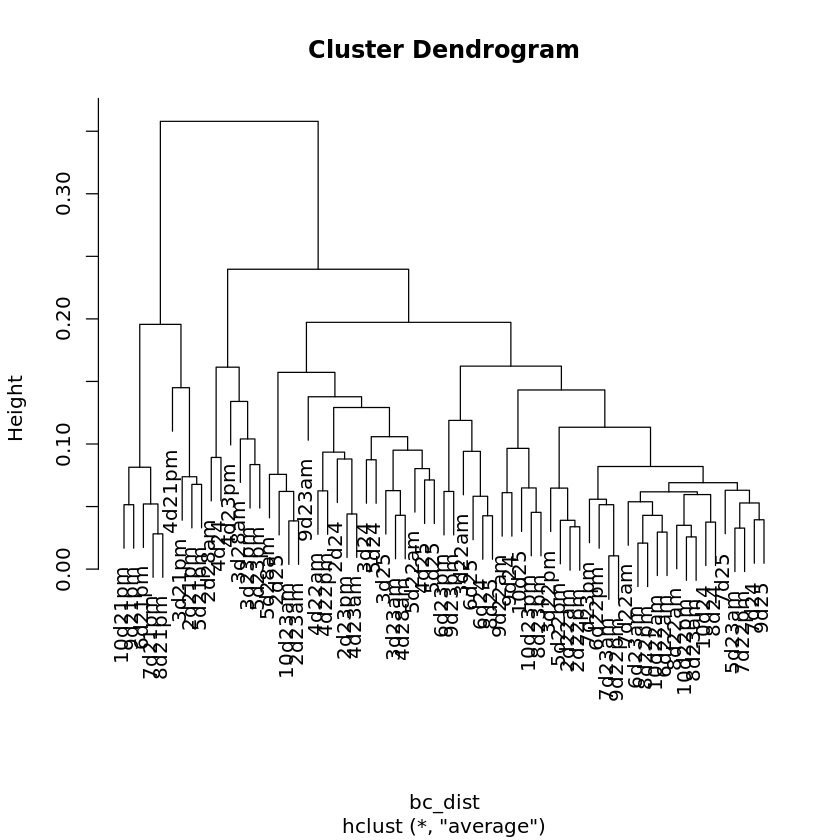

In [81]:
cluster_average <- hclust (bc_dist, method = 'average')
plot(cluster_average)

**PCA**

In [83]:
stand_abund_table <- decostand(abund_table_phase2_otu, method = "total")
PCA <-rda(stand_abund_table)
PCA

Call: rda(X = stand_abund_table)

              Inertia Rank
Total         0.02741     
Unconstrained 0.02741   36
Inertia is variance 

Eigenvalues for unconstrained axes:
     PC1      PC2      PC3      PC4      PC5      PC6      PC7      PC8 
0.020376 0.005554 0.000554 0.000230 0.000185 0.000157 0.000128 0.000078 
(Showing 8 of 36 unconstrained eigenvalues)


In [84]:
sum (apply (stand_abund_table, 2, var))

[1] 0.02741393

Warning message in arrows(0, 0, g$species[, 1] * arrlen, g$species[, 2] * arrlen, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, g$species[, 1] * arrlen, g$species[, 2] * arrlen, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, g$species[, 1] * arrlen, g$species[, 2] * arrlen, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, g$species[, 1] * arrlen, g$species[, 2] * arrlen, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, g$species[, 1] * arrlen, g$species[, 2] * arrlen, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, g$species[, 1] * arrlen, g$species[, 2] * arrlen, :
“zero-length arrow is of indeterminate angle and so skipped”

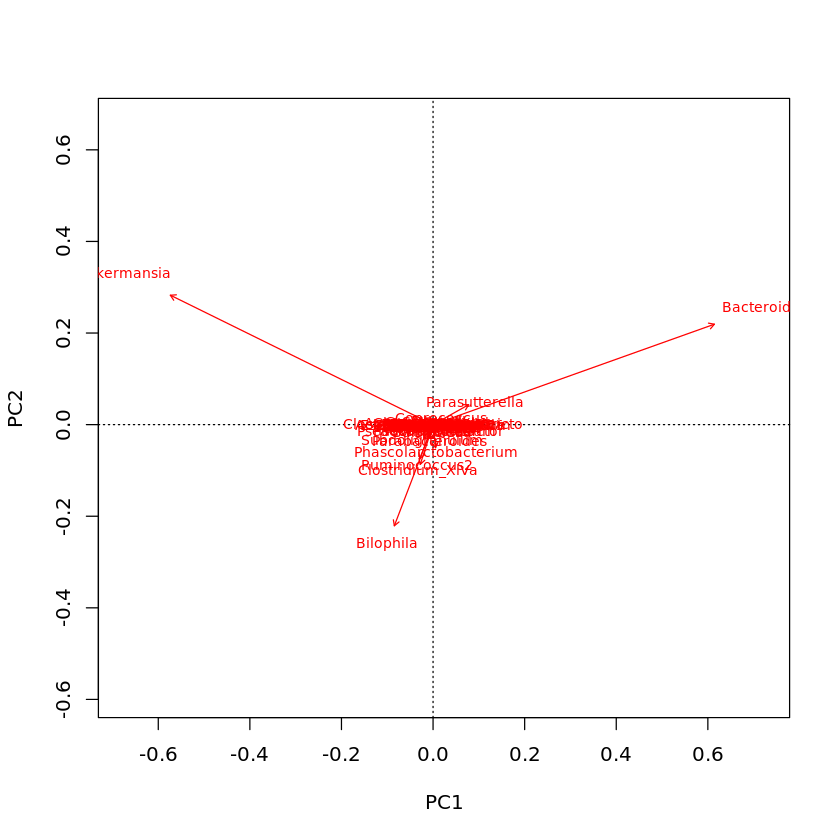

In [85]:
biplot(PCA, display = 'species')

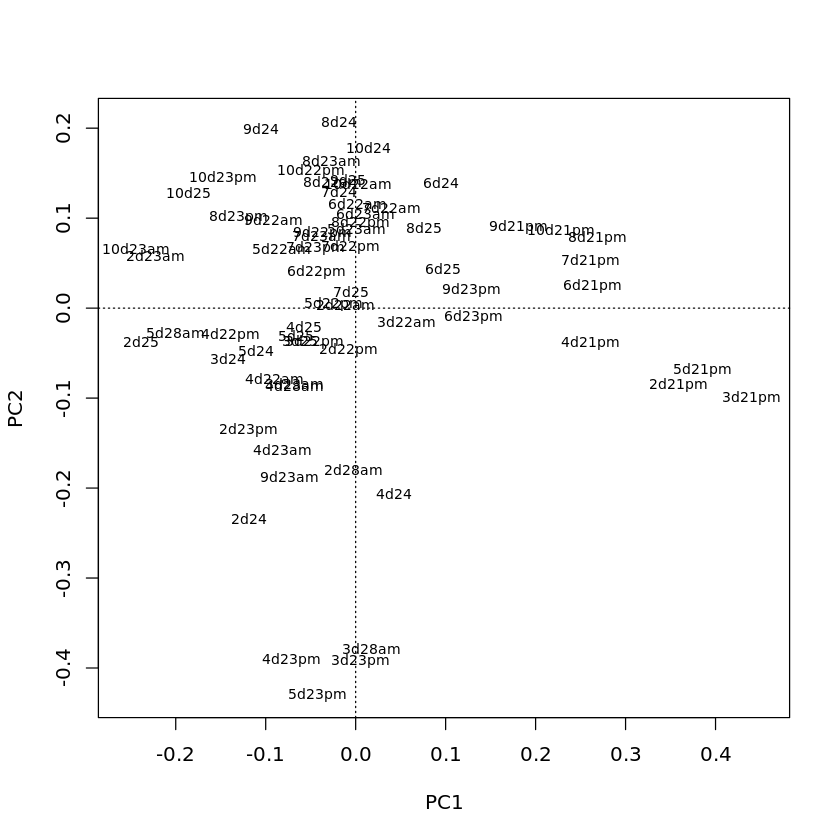

In [86]:
ordiplot(PCA, display = "sites", type = "text")

In [89]:
"cleanplot.pca" <- function(res.pca, ax1=1, ax2=2, point=FALSE,
ahead=0.07, cex=0.7)
{
par(mfrow=c(1,2))
p <- length(res.pca$CA$eig)
# Scaling 1: "species" scores scaled to relative eigenvalues
sit.sc1 <- scores(res.pca, display="wa", scaling=1, choices=c(1:p))
spe.sc1 <- scores(res.pca, display="sp", scaling=1, choices=c(1:p))
plot(res.pca, choices=c(ax1, ax2), display=c("wa", "sp"), type="n",
main="PCA - scaling 1", scaling=1)
if (point)
{
points(sit.sc1[,ax1], sit.sc1[,ax2], pch=20)
text(res.pca, display="wa", choices=c(ax1, ax2), cex=cex,
pos=3, scaling=1)
}
else
{
text(res.pca, display="wa", choices=c(ax1, ax2), cex=cex,
scaling=1)
}
text(res.pca, display="sp", choices=c(ax1, ax2), cex=cex, pos=4,
col="red", scaling=1)
arrows(0, 0, spe.sc1[,ax1], spe.sc1[,ax2], length=ahead, angle=20,
col="red")
pcacircle(res.pca)
# Scaling 2: site scores scaled to relative eigenvalues
sit.sc2 <- scores(res.pca, display="wa", choices=c(1:p))
spe.sc2 <- scores(res.pca, display="sp", choices=c(1:p))
plot(res.pca, choices=c(ax1,ax2), display=c("wa","sp"), type="n",
main="PCA - scaling 2")
if (point) {
points(sit.sc2[,ax1], sit.sc2[,ax2], pch=20)
text(res.pca, display="wa", choices=c(ax1 ,ax2), cex=cex, pos=3)
}
else
{
text(res.pca, display="wa", choices=c(ax1, ax2), cex=cex)
}
text(res.pca, display="sp", choices=c(ax1, ax2), cex=cex, pos=4,
col="red")
arrows(0, 0, spe.sc2[,ax1], spe.sc2[,ax2], length=ahead,
angle=20, col="red")
}
"pcacircle" <- function (pca)
{
# Draws a circle of equilibrium contribution on a PCA plot
# generated from a vegan analysis.
# vegan uses special constants for its outputs, hence
# the 'const' valuebelow.
eigenv <- pca$CA$eig
p <- length(eigenv)
n <- nrow(pca$CA$u)
tot <- sum(eigenv)
const <- ((n - 1) * tot)^0.25
radius <- (2/p)^0.5
radius <- radius * const
symbols(0, 0, circles=radius, inches=FALSE, add=TRUE, fg=2)
}

Warning message in arrows(0, 0, spe.sc1[, ax1], spe.sc1[, ax2], length = ahead, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, spe.sc1[, ax1], spe.sc1[, ax2], length = ahead, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, spe.sc1[, ax1], spe.sc1[, ax2], length = ahead, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, spe.sc1[, ax1], spe.sc1[, ax2], length = ahead, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, spe.sc1[, ax1], spe.sc1[, ax2], length = ahead, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, spe.sc1[, ax1], spe.sc1[, ax2], length = ahead, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, spe.sc1[, ax1], spe.sc1[, ax2], length = ahead, :
“zero-length arrow is of indeterminate angle and so skipped”Warnin

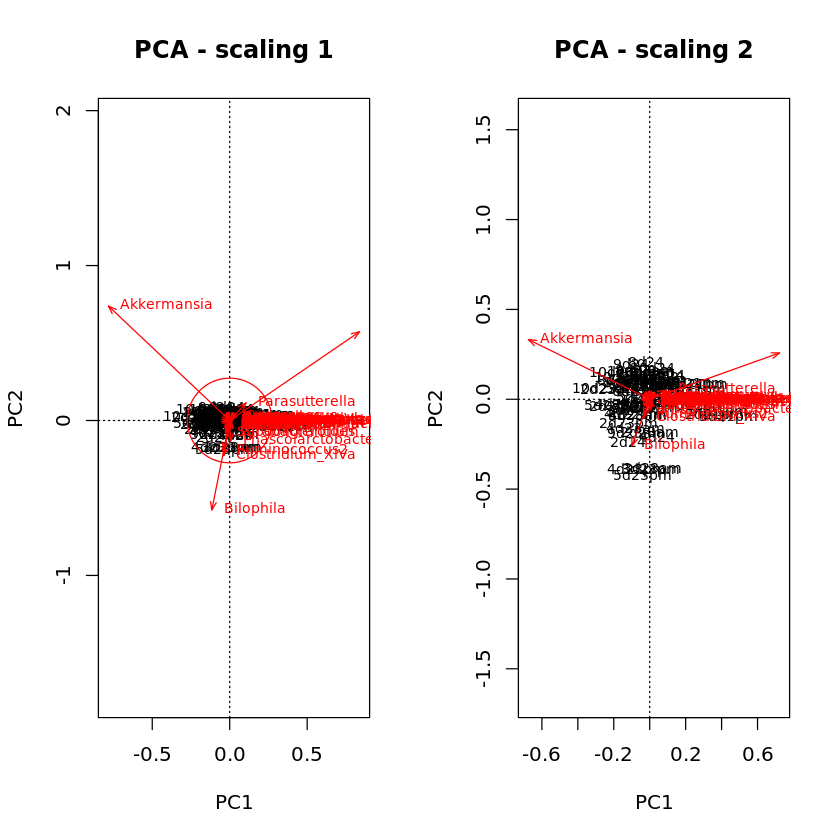

In [90]:
cleanplot.pca (PCA)

In [92]:
bc_dist <-vegdist(abund_table_phase2_otu, "bray")
PCoA <- cmdscale (bc_dist, eig = TRUE,k = 2)
explainedvar1 <- round(PCoA$eig[1] / sum(PCoA$eig), 2) * 100
explainedvar2 <- round(PCoA$eig[2] / sum(PCoA$eig), 2) * 100
sum_eig <- sum(explainedvar1, explainedvar2)

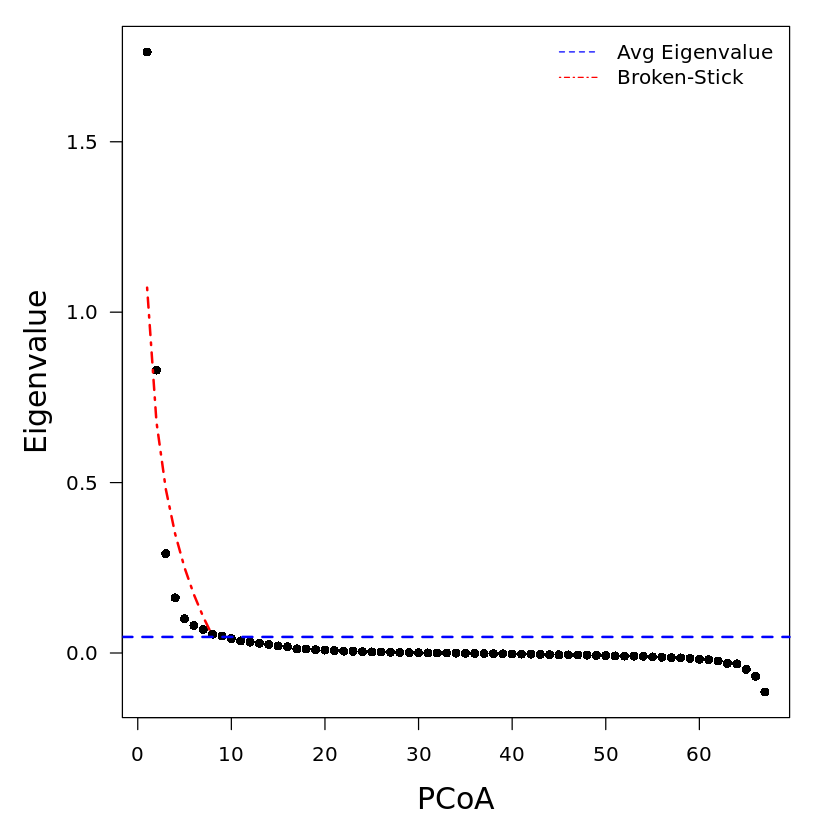

In [94]:
par(mar = c(5, 5, 1, 2) + 0.1)
plot(PCoA$eig, xlab = "PCoA", ylab = "Eigenvalue", las = 1, cex.lab = 1.5, pch = 16)
abline(h = mean(PCoA$eig), lty = 2, lwd = 2, col = "blue")
b_stick <- bstick(8, sum(PCoA$eig))
lines(1:8, b_stick, type = "l", lty = 4, lwd = 2, col = "red")
legend('topright', legend = c("Avg Eigenvalue", "Broken-Stick"),lty = c(2, 4), bty = "n", col = c("blue", "red"))
par(mar = c(5, 5, 1, 2) + 0.1)

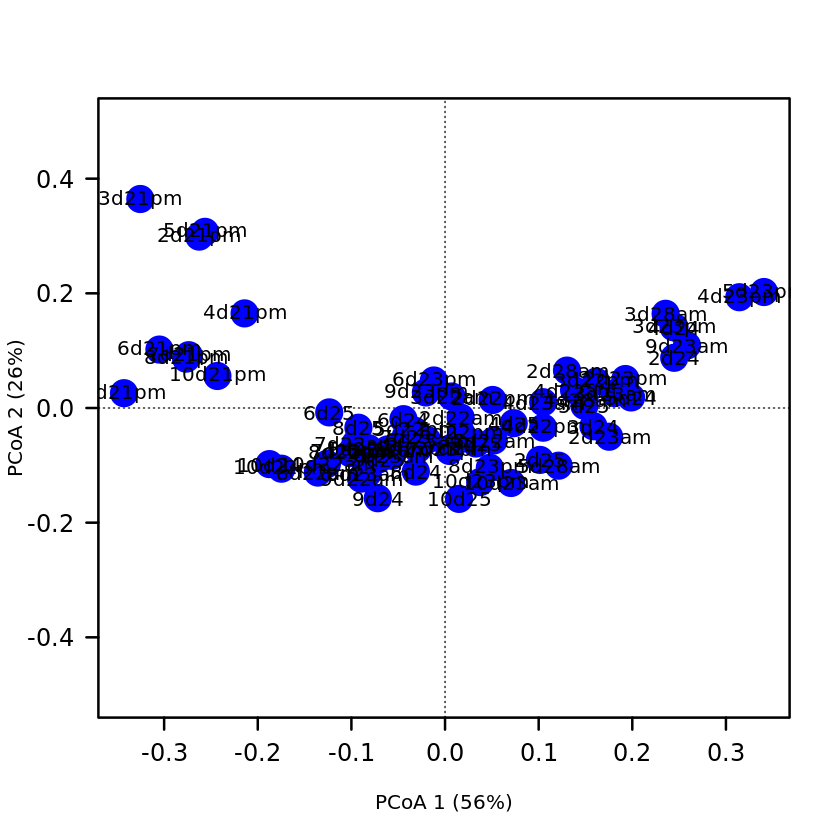

In [95]:
plot(PCoA$points[ ,1], PCoA$points[ ,2], ylim = c(-0.5, 0.5),xlab = paste("PCoA 1 (", explainedvar1, "%)", sep = ""),ylab = paste("PCoA 2 (", explainedvar2, "%)", sep = ""),pch = 5, cex = 1.0, type = "n", cex.lab = 1.0, cex.axis = 1.2,
axes = FALSE)
axis(side = 1, labels = T, lwd.ticks = 2, cex.axis = 1.2, las = 1)
axis(side = 2, labels = T, lwd.ticks = 2, cex.axis = 1.2, las = 1)
abline(h = 0, v = 0, lty = 3)
box(lwd = 2)
points(PCoA$points[ ,1], PCoA$points[ ,2], pch = 19, cex = 3, bg = "blue", col = "blue")
text(PCoA$points[ ,1], PCoA$points[ ,2],labels = row.names(PCoA$points))

In [96]:
1

[1] 1